# EDA and Preprocessing

## Table of Contents
- 

In [14]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from datetime import datetime

import seaborn as sns
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from warnings import catch_warnings
from warnings import filterwarnings
import warnings

warnings.simplefilter(action="ignore")

In [15]:
data = pd.read_csv('../Data/Data_concat.csv')
data.head()

DATE  IA_PRCP  IL_PRCP  MN_PRCP  TMAX_IA  TMAX_IL  TMAX_MN  TMIN_IA  \
0  1990-01-02     0.00     0.00      0.0     49.0     45.0     27.0     28.0   
1  1990-01-03     0.00     0.00      0.0     45.0     49.0     32.0     35.0   
2  1990-01-04     0.94     0.05      0.0     42.0     47.0     26.0     21.0   
3  1990-01-05     0.00     0.00      0.0     40.0     38.0     20.0     18.0   
4  1990-01-08     0.00     0.00      0.0     43.0     50.0     40.0     31.0   

   TMIN_IL  TMIN_MN  Settlement Price  
0     25.0      1.0             5.613  
1     32.0     19.0             5.673  
2     32.0      1.0             5.633  
3     16.0     11.0             5.645  
4     21.0     16.0             5.707

In [7]:
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace=True)
data.sort_index(inplace=True)
data

IA_PRCP  IL_PRCP  MN_PRCP  TMAX_IA  TMAX_IL  TMAX_MN  TMIN_IA  \
DATE                                                                        
1990-01-02     0.00     0.00     0.00     49.0     45.0     27.0     28.0   
1990-01-03     0.00     0.00     0.00     45.0     49.0     32.0     35.0   
1990-01-04     0.94     0.05     0.00     42.0     47.0     26.0     21.0   
1990-01-05     0.00     0.00     0.00     40.0     38.0     20.0     18.0   
1990-01-08     0.00     0.00     0.00     43.0     50.0     40.0     31.0   
...             ...      ...      ...      ...      ...      ...      ...   
2019-12-24     0.00     0.00     0.00     53.0     57.0     32.0     27.0   
2019-12-26     0.00     0.01     0.01     62.0     68.0     33.0     32.0   
2019-12-27     0.00     0.00     0.02     37.0     48.0     25.0     32.0   
2019-12-30     0.00     0.00     0.38     48.0     42.0     33.0     28.0   
2019-12-31     0.00     0.00     0.00     41.0     42.0     18.0     29.0   

            TMIN_IL  TMIN_MN  Settlement Price  
DATE                                            
1990-01-02     25.0      1.0             5.613  
1990-01-03     32.0     19.0             5.673  
1990-01-04     32.0      1.0             5.633  
1990-01-05     16.0     11.0             5.645  
1990-01-08     21.0     16.0             5.707  
...             ...      ...               ...  
2019-12-24     26.0     22.0             9.365  
2019-12-26     46.0     22.0             9.465  
2019-12-27     39.0     20.0             9.415  
2019-12-30     35.0     16.0             9.525  
2019-12-31     35.0      9.0             9.555  

[7559 rows x 10 columns]

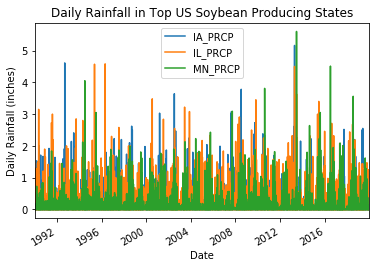

In [10]:
data.drop(columns = ['TMAX_IA', 'TMAX_IL', 'TMAX_MN',
       'TMIN_IA', 'TMIN_IL', 'TMIN_MN', 'Settlement Price']).plot() 
plt.xlabel('Date')
plt.ylabel('Daily Rainfall (inches)')
plt.title('Daily Rainfall in Top US Soybean Producing States');

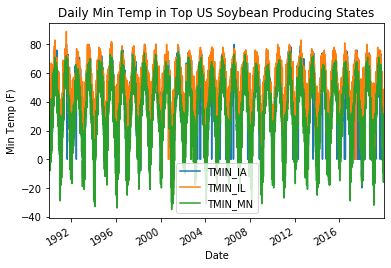

In [11]:
data.drop(columns = ['IA_PRCP', 'IL_PRCP', 'MN_PRCP', 'TMAX_IA', 'TMAX_IL', 'TMAX_MN', 'Settlement Price']).plot() 
plt.xlabel('Date')
plt.ylabel('Min Temp (F)')
plt.title('Daily Min Temp in Top US Soybean Producing States');

In [13]:
data.describe()

IA_PRCP      IL_PRCP      MN_PRCP      TMAX_IA      TMAX_IL  \
count  7559.000000  7559.000000  7559.000000  7559.000000  7559.000000   
mean      0.099735     0.120437     0.073514    59.598756    68.813732   
std       0.302506     0.347238     0.251940    22.585394    19.677143   
min       0.000000     0.000000     0.000000    -8.000000     0.000000   
25%       0.000000     0.000000     0.000000    42.000000    54.000000   
50%       0.000000     0.000000     0.000000    63.000000    72.000000   
75%       0.020000     0.030000     0.020000    79.000000    85.000000   
max       5.160000     4.580000     5.600000   105.000000   106.000000   

           TMAX_MN      TMIN_IA      TMIN_IL      TMIN_MN  Settlement Price  
count  7559.000000  7559.000000  7559.000000  7559.000000       7559.000000  
mean     52.609737    39.699167    46.267231    32.680513          8.151505  
std      24.987382    20.625807    17.902481    22.921733          2.956745  
min     -21.000000   -27.000000   -14.000000   -35.000000          4.100000  
25%      33.000000    25.000000    32.000000    17.000000          5.727000  
50%      56.000000    41.000000    48.000000    34.000000          7.265000  
75%      75.000000    57.000000    62.000000    53.000000          9.847000  
max      99.000000    80.000000    89.000000    76.000000         17.683000

In [ ]:
data['IA_prcp_lag_1'] = data['IA_PRCP'].shift(1)
data['IL_prcp_lag_1'] = data['IL_PRCP'].shift(1)
data['MN_prcp_lag_1'] = data['MN_PRCP'].shift(1)

data['IA_TMIN_lag_1'] = data['TMIN_IA'].shift(1)
data['IL_TMIN_lag_1'] = data['TMIN_IL'].shift(1)
data['MN_TMIN_lag_1'] = data['TMIN_MN'].shift(1)
data['IA_TMIN_lag_360'] = data['TMIN_IA'].shift(360)
data['IL_TMIN_lag_360'] = data['TMIN_IL'].shift(360)
data['MN_TMIN_lag_360'] = data['TMIN_MN'].shift(360)

data['IA_TMAX_lag_1'] = data['TMAX_IA'].shift(1)
data['IL_TMAX_lag_1'] = data['TMAX_IL'].shift(1)
data['MN_TMAX_lag_1'] = data['TMAX_MN'].shift(1)
data['IA_TMAX_lag_360'] = data['TMAX_IA'].shift(360)
data['IL_TMAX_lag_360'] = data['TMAX_IL'].shift(360)
data['MN_TMAX_lag_360'] = data['TMAX_MN'].shift(360)


In [ ]:
data.to_csv('../data/data_concat_clean.csv')